In [86]:
import numpy as np
import random as rn
import os 
from numpy.random import randint
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colorbar
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from typing import NoReturn, Text
import warnings
import time
# import pyvista as pv
# from scipy.signal import find_peaks
from celluloid import Camera
from datetime import datetime

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
# pv.set_plot_theme("document")
%matplotlib inline

from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
from geovoronoi import voronoi_regions_from_coords
from geovoronoi import polygon_lines_from_voronoi
import shapely
from shapely.geometry import Point
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
from descartes import PolygonPatch
import numpy as np
from shapely.geometry.polygon import LinearRing, Polygon
# import pyvista as pv
from matplotlib import cm
import datetime


In [16]:
#import local scripts
from Agent import Agent
from Model import Model
from Grid import Grid

In [17]:
## Set seed for random generation
def seed_everything(seed : int) -> NoReturn :
    """To set the see for all potential random number usages. If you are using 
    any other package which might use seed for random generation add it here"""
    rn.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    #tf.random.set_seed(seed)  ##uncomment if you are using tensorflow
    
SEED = 123123
seed_everything(SEED)

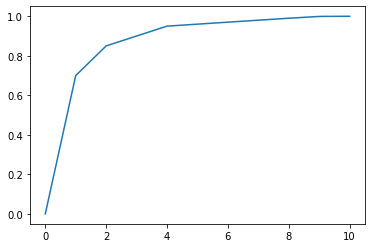

In [22]:
F_points_target = np.array([0, 0.7, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999, 1])
plt.plot(F_points_target)

In [40]:
### set parameters 
TURNS = 40
AGENTSPERTURN = 5
RATIOTRACKEDAGENTS = 1.
all_vals_len = 200*100

# set up TI_zone env
# generate 2D mesh
x = np.arange(0,200+1,1,)
y = np.arange(0,100+1,1)
x_grid, y_grid = np.meshgrid(x,y)
#get cell centers of mesh
x_cell_center = x_grid[:-1,:-1]+0.5
y_cell_center = y_grid[:-1,:-1]+0.5
TI_zones = []
for y in range(x_cell_center.shape[0]):
    for x in range(len(x_cell_center[1])):
        if 70 <= x_cell_center[y,x] <=130:
            TI_zones.append(1)
        else:
            TI_zones.append(0)
TI_zones = np.array(TI_zones)
TI_zones = TI_zones.reshape((200,100,1))

# create curve and save resultign desired LC
Phi_points_target = np.linspace(0, 1, num=11, endpoint=True)
# F_points_target = np.array([0, 0.2, 0.35, 0.6, 0.65, 0.7, 0.8, 0.85, 0.9, 0.95, 1])
F_points_target = np.array([0, 0.7, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999, 1])

output_folder = str(datetime.datetime.today().replace(microsecond= 0, second = 0).strftime("%Y_%m_%d_%H_%M"))

In [31]:
t1 = time.time()

model = Model(env = TI_zones, 
              number_of_turns=TURNS, number_of_starting_agents = 10,new_agent_every_n_turns = 1,max_number_agents = 25,
              ratio_of_tracked_agents = 1.,number_training_image_zones = 2, number_training_images_per_zone = 20,output_folder = output_folder,
              Phi_points_target=Phi_points_target,F_points_target=F_points_target,max_number_of_position_tests = 15 ,n_processes = None,neighbourhood_radius = 10, neighbourhood_search_step_size = 5,
             )
model.run()
print("Simulation took {0:2.2f} seconds".format(time.time()-t1))
test_df =model.get_final_results()
print(test_df.head(20))

Shape of your environment: (200, 100, 1)
=======loading training images=========
Training images loaded! -  took 25.16 seconds
=======Initiating grid=========
Grid initiated! -  took 0.00 seconds
generated new agent
generated new agent
generated new agent
generated new agent
generated new agent
generated new agent
generated new agent
generated new agent
generated new agent
generated new agent
=======Turn 0========
random move          
Killed agent 1        
agent removed from grid
Moving agents done                  
Generating agents done              
Misfit: 0.43780773878097534
=======Turn 1========
generated new agent
random move          
Moving agents done                  
Generating agents done              
Misfit: 0.38071247935295105
=======Turn 2========
generated new agent
random move          
Killed agent 2        
agent removed from grid
Moving agents done                  
Generating agents done              
Misfit: 0.45921939611434937
=======Turn 3========
generated 

Killed agent 12        
agent removed from grid
Killed agent 27        
agent removed from grid
random move          
Killed agent 44        
agent removed from grid
Moving agents done                  
Generating agents done              
Misfit: 0.4253257215023041
=======Turn 38========
generated new agent
random move          
random move          
Killed agent 47        
agent removed from grid
Moving agents done                  
Generating agents done              
Misfit: 0.5975867509841919
=======Turn 39========
generated new agent
Killed agent 45        
agent removed from grid
Moving agents done                  
Generating agents done              
Misfit: 0.34578922390937805
Simulation took 90385.54 seconds
    AgentID  Start_x  Start_y  Start_z  End_x  End_y  End_z    misfit
0        14      141       74        0  166.0   89.0    0.0  0.345789
1        16       47       26        0   77.0   46.0    0.0  0.345789
2        18        4       85        0   49.0   65.0    0.0  

In [64]:
tracker = model.get_all_tracks()
tracker[0]

array([[26.        , 44.        ,  0.        ,  0.        ,  0.        ,
        15.        ,  0.79058832],
       [26.        , 39.        ,  0.        ,  1.        ,  1.        ,
        16.        ,  0.43780774],
       [26.        , 49.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.38071248],
       [26.        , 59.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.4592194 ],
       [26.        , 64.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.39694509],
       [16.        , 64.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.26651332],
       [26.        , 64.        ,  0.        ,  0.        ,  0.        ,
         8.        ,  0.45119333],
       [26.        , 64.        ,  0.        ,  0.        ,  0.        ,
        16.        ,  0.36692753],
       [26.        , 74.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.34377289],
       [26.        , 64.    

In [82]:
iteration=[]
for turns in range(TURNS+1):
    agent_pos = []
    for agent_id in range(model.current_id+1):
        agent_pos.append(tracker[agent_id][turns][0:7])
    
    iteration.append(agent_pos)
iteration = np.array(iteration)


In [83]:
N = 50
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
viridis = cm.get_cmap('jet', 5)
viridis(3)

(1.0, 0.5925925925925927, 0.0, 1.0)

In [84]:
grid = Polygon([(0, 0), (0, 100), (200, 100), (200, 0)])


(0.0, 100.0)

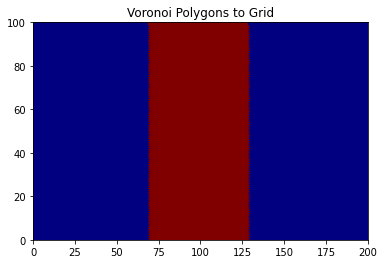

In [87]:
# generate 2D mesh
x = np.arange(0,200+1,1,)
y = np.arange(0,100+1,1)
x_grid, y_grid = np.meshgrid(x,y)
# get cell center
x_cell_center = x_grid[:-1,:-1]+0.5
y_cell_center = y_grid[:-1,:-1]+0.5
cell_center_which_polygon = np.zeros(len(x_cell_center.flatten()))
which_TI_zone = np.zeros(len(x_cell_center.flatten()))
# array to assign polygon to cell id
all_cell_center = np.column_stack((x_cell_center.flatten(),y_cell_center.flatten(),cell_center_which_polygon,which_TI_zone))
plt.scatter(x_cell_center,y_cell_center, c = TI_zones,cmap=viridis)
plt.title("Voronoi Polygons to Grid")
plt.xlim([0,200])
plt.ylim([0,100])

(0.0, 100.0)

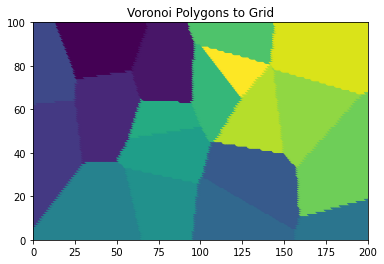

In [88]:
# in what voronoi polygon do cell centers plot
for i in range(len(all_cell_center)):
    for voronoi_polygon_id in range(len(poly_shapes)):
        
        polygon = poly_shapes[voronoi_polygon_id]
        cell_id = Point(all_cell_center[i,0],all_cell_center[i,1])
        
        if polygon.intersects(cell_id):
            all_cell_center[i,2] = voronoi_polygon_id

plt.scatter(x_cell_center,y_cell_center, c = all_cell_center[:,2])
plt.title("Voronoi Polygons to Grid")
plt.xlim([0,200])
plt.ylim([0,100])


In [89]:
len(poly_shapes)

19

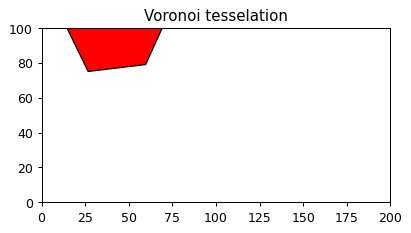

In [90]:
fig = plt.figure(1, figsize=(5,5), dpi=90)
color = ["red","blue","green","black"]#,"yellow","red","blue","green","black","yellow","red","blue","green","black","yellow"]
# color = 100*np.random.randint(n_voronoi)
N = 15
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
ax = fig.add_subplot(111)
# for i in range(len(poly_shapes)):
for i in range(1):
    TI_id = int(zone[i])
    ring_patch = PolygonPatch(poly_shapes[i], facecolor = color[TI_id])# viridis(TI_id))
    ax.add_patch(ring_patch)
    ax.set_title('Voronoi tesselation')
    xrange = [0, 200]
    yrange = [0, 100]
    ax.set_xlim(*xrange)
    ax.set_ylim(*yrange)
    ax.set_aspect(1)


# plt.xlim([0,10])
# plt.ylim([0,10])

In [91]:
tracker[0][0]

array([26.        , 44.        ,  0.        ,  0.        ,  0.        ,
       15.        ,  0.79058832])

In [92]:
zone
# len(poly_shapes)

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1.])

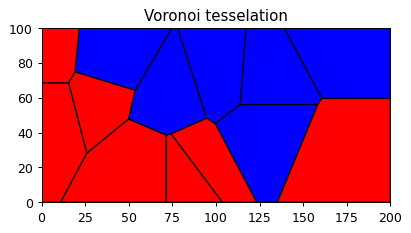

In [93]:
iter_to_display = 10
# extract voronoi point and TI_zone affiliated with them
voronoi_points = np.vstack((iteration[iter_to_display][:,0],iteration[iter_to_display][:,1])).T
voronoi_points = voronoi_points[~np.isnan(voronoi_points).any(axis=1)]

zone = iteration[iter_to_display][:,4]
zone = zone[~np.isnan(zone)]
# zone[-1]=zone[-2]
# get voronoi regions
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(voronoi_points, grid)

fig = plt.figure(1, figsize=(5,5), dpi=90)
# color = ["red","blue","green","black","yellow","red","blue","green","black","yellow","red","blue","green","black","yellow"]
# color = 100*np.random.randint(len(voronoi_points))
# viridis = cm.get_cmap('viridis', model.current_id+1)

ax = fig.add_subplot(111)
for j in range(len(poly_shapes)):
    TI_id = int(zone[j])
    ring_patch = PolygonPatch(poly_shapes[j], facecolor =  color[TI_id])
    ax.add_patch(ring_patch)
    ax.set_title('Voronoi tesselation')
    xrange = [0, 200]
    yrange = [0, 100]
    ax.set_xlim(*xrange)
    ax.set_ylim(*yrange)
    ax.set_aspect(1)



In [94]:
range(6)

range(0, 6)

In [95]:
%matplotlib notebook
%matplotlib notebook

In [105]:
iteration[0][:,5]

array([15.,  5.,  0.,  8., 12.,  3.,  4.,  9., 15.,  6., nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

<IPython.core.display.Javascript object>


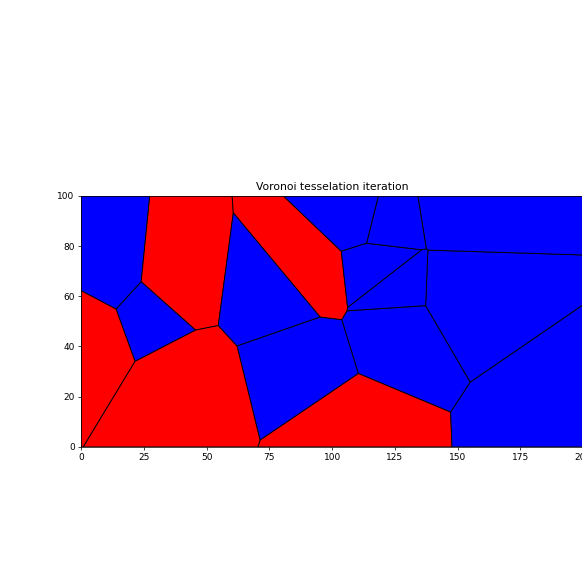

In [111]:
fig = plt.figure(figsize = (10,10))
camera = Camera(fig)
for i in range(TURNS+1):
    # extract voronoi points and TI_zone affiliated with them
    voronoi_points = np.vstack((iteration[i][:,0],iteration[i][:,1])).T
    voronoi_points = voronoi_points[~np.isnan(voronoi_points).any(axis=1)]

    zone = iteration[i][:,4]
    zone = zone[~np.isnan(zone)]

    # get voronoi regions
    poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(voronoi_points, grid)

    fig = plt.figure(1, figsize=(5,5), dpi=90)
    color = ["red","blue","green","black","yellow","red","blue","green","black","yellow","red","blue","green","black","yellow","red","blue","green","black","yellow","red","blue","green","black","yellow"]
#     color = 100*np.random.randint(len(voronoi_points))
    viridis = cm.get_cmap('jet', 12)

    ax = fig.add_subplot(111)
    for j in range(len(poly_shapes)):
        TI_id = zone[j]
        ring_patch = PolygonPatch(poly_shapes[j], facecolor =  color[int(TI_id)])
        ax.add_patch(ring_patch)
        ax.set_title('Voronoi tesselation iteration')
        xrange = [0, 200]
        yrange = [0, 100]
        ax.set_xlim(*xrange)
        ax.set_ylim(*yrange)
        ax.set_aspect(1)


    # plt.xlim([0,10])
    # plt.ylim([0,10])
    camera.snap()
animation = camera.animate()

In [81]:
### Save the animated plot as GIF ###

import matplotlib.animation as mpl_anim

# Set up formatting for the movie files
Writer = mpl_anim.PillowWriter
writer = Writer(fps=1, metadata=dict(artist='Steffens'), bitrate=1800)


animation.save('animated_2D_plot.gif', writer=writer)

In [79]:
from numpy.random import choice
agent_evaluation = [1,2,3]
best_new_position = choice(np.arange(len(agent_evaluation)),1)[0]
best_new_position

1

In [15]:
agent_evaluation[0:3]

[1, 2, 3]